# Brest-Cancer-Classification(DT-RF-GB)

Use the "Run" button to execute the code.

In [1]:
!pip install jovian  --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="Brest-Cancer-Classification(DT-RF-GB)")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "landryroni/brest-cancer-classification-dt-rf-gb" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb


'https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb'

The following topics are covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- training and interpreting gradient boosting
- Making predictions on single inputs
- option(Overfitting, hyperparameter tuning & regularization)

How to run the code

This tutorial is an executable Jupyter notebook hosted on Jovian. You can run this tutorial and experiment with the code examples in a couple of ways: using free online resources (recommended) or on your computer.

Option 1: Running using free online resources (1-click, recommended)
The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Colab. You will be prompted to connect your Google Drive account so that this notebook can be placed into your drive for execution.

Option 2: Running on your computer locally
To run the code on your computer locally, you'll need to set up Python, download the notebook and install the required libraries. We recommend using the Conda distribution of Python. Click the Run button at the top of this page, select the Run Locally option, and follow the instructions.

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use decision trees, random forests and gradient boosting to solve a real-world problem from Kaggle:

The Brest cancer Wiscosin(diagnostic)  dataset is made of contains Class distribution: 357 benign, 212 malignant where Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image:

The main work here is to classify whether a tumor is benign or malignant

Install the libraries we going to use

In [4]:
!pip install numpy matplotlib seaborn plotly pandas opendatasets --upgrade --quiet

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd
import matplotlib
import os
%matplotlib inline

In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",150)
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

### Download the dataset 

The dataset is available at https://www.kaggle.com/uciml/breast-cancer-wisconsin-data we will use opendatasets library to download the dataset forom kaggle directly 

In [7]:
od.download("https://www.kaggle.com/uciml/breast-cancer-wisconsin-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dejolilandry
Your Kaggle Key: ········


100%|██████████| 48.6k/48.6k [00:00<00:00, 21.7MB/s]

In [10]:
os.listdir("./breast-cancer-wisconsin-data")

['data.csv']

Using pandas dataFrame to laod the file `data.csv` that contains the data.

In [11]:
brest_df = pd.read_csv("breast-cancer-wisconsin-data/data.csv")

In [12]:
brest_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Each row represente the features taken from each cell nucleus

Let's check column type of the dataset.

In [13]:
brest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Check th empty columns

In [14]:
brest_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There is an empty column Unnamed that we can drop

In [15]:
brest_df.drop(columns=["Unnamed: 32"], inplace=True)
brest_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Perform an EDA(exploratory data analysis) on the dataset and study the relashionship between columns with the `diagnosis` column.

In [16]:
# !pip install pandas_profiling --quiet
# from pandas_profiling import ProfileReport
# cancer_df = brest_df.copy()
# cancer_df.dropna(subset=["diagnosis","id"], inplace=True)
# profile = ProfileReport(cancer_df,title="Brest cancer" )
# profile

In [17]:
columns = []
for i in brest_df.columns:
    if i not in ["diagnosis","id"]:
        columns.append(i)

Text(0.5, 1, 'Relationship between first 5 row attribute with final diagnosis')

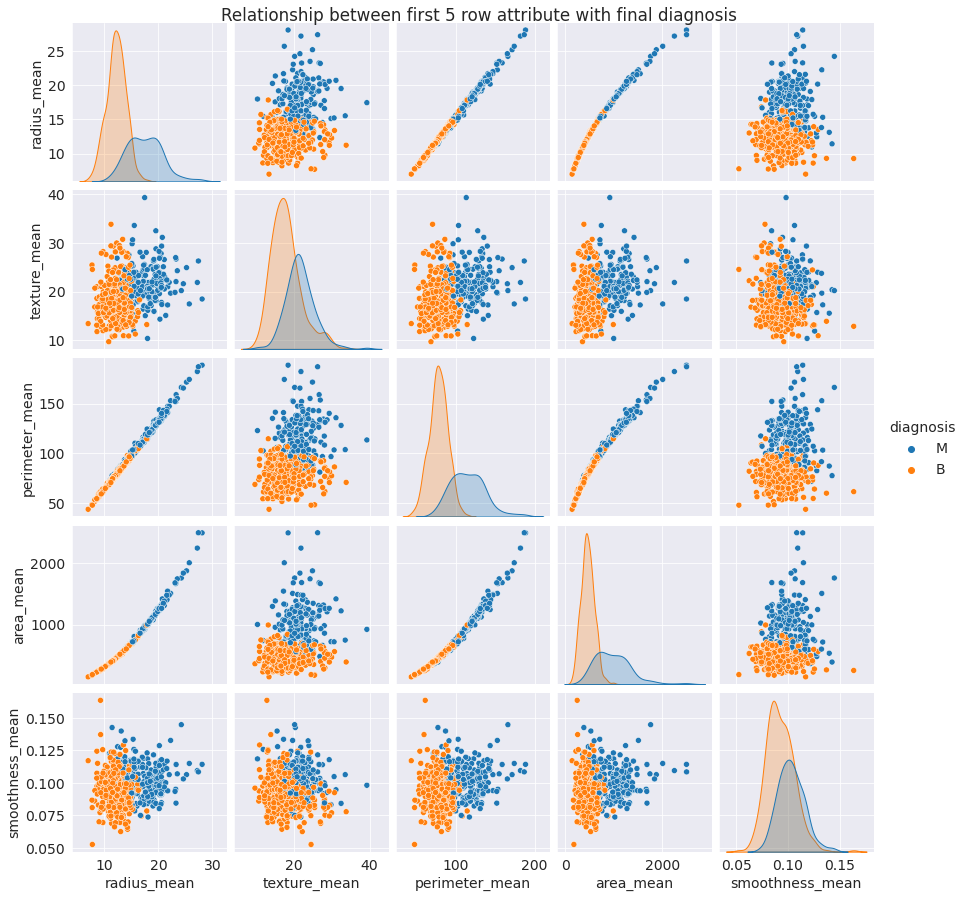

In [18]:
title="Relationship between first 5 row attribute with final diagnosis"
fig = sns.pairplot(data=brest_df, vars=columns[:5],hue="diagnosis")
plt.suptitle(title,y=1)

In [19]:
import warnings
warnings.filterwarnings("ignore")

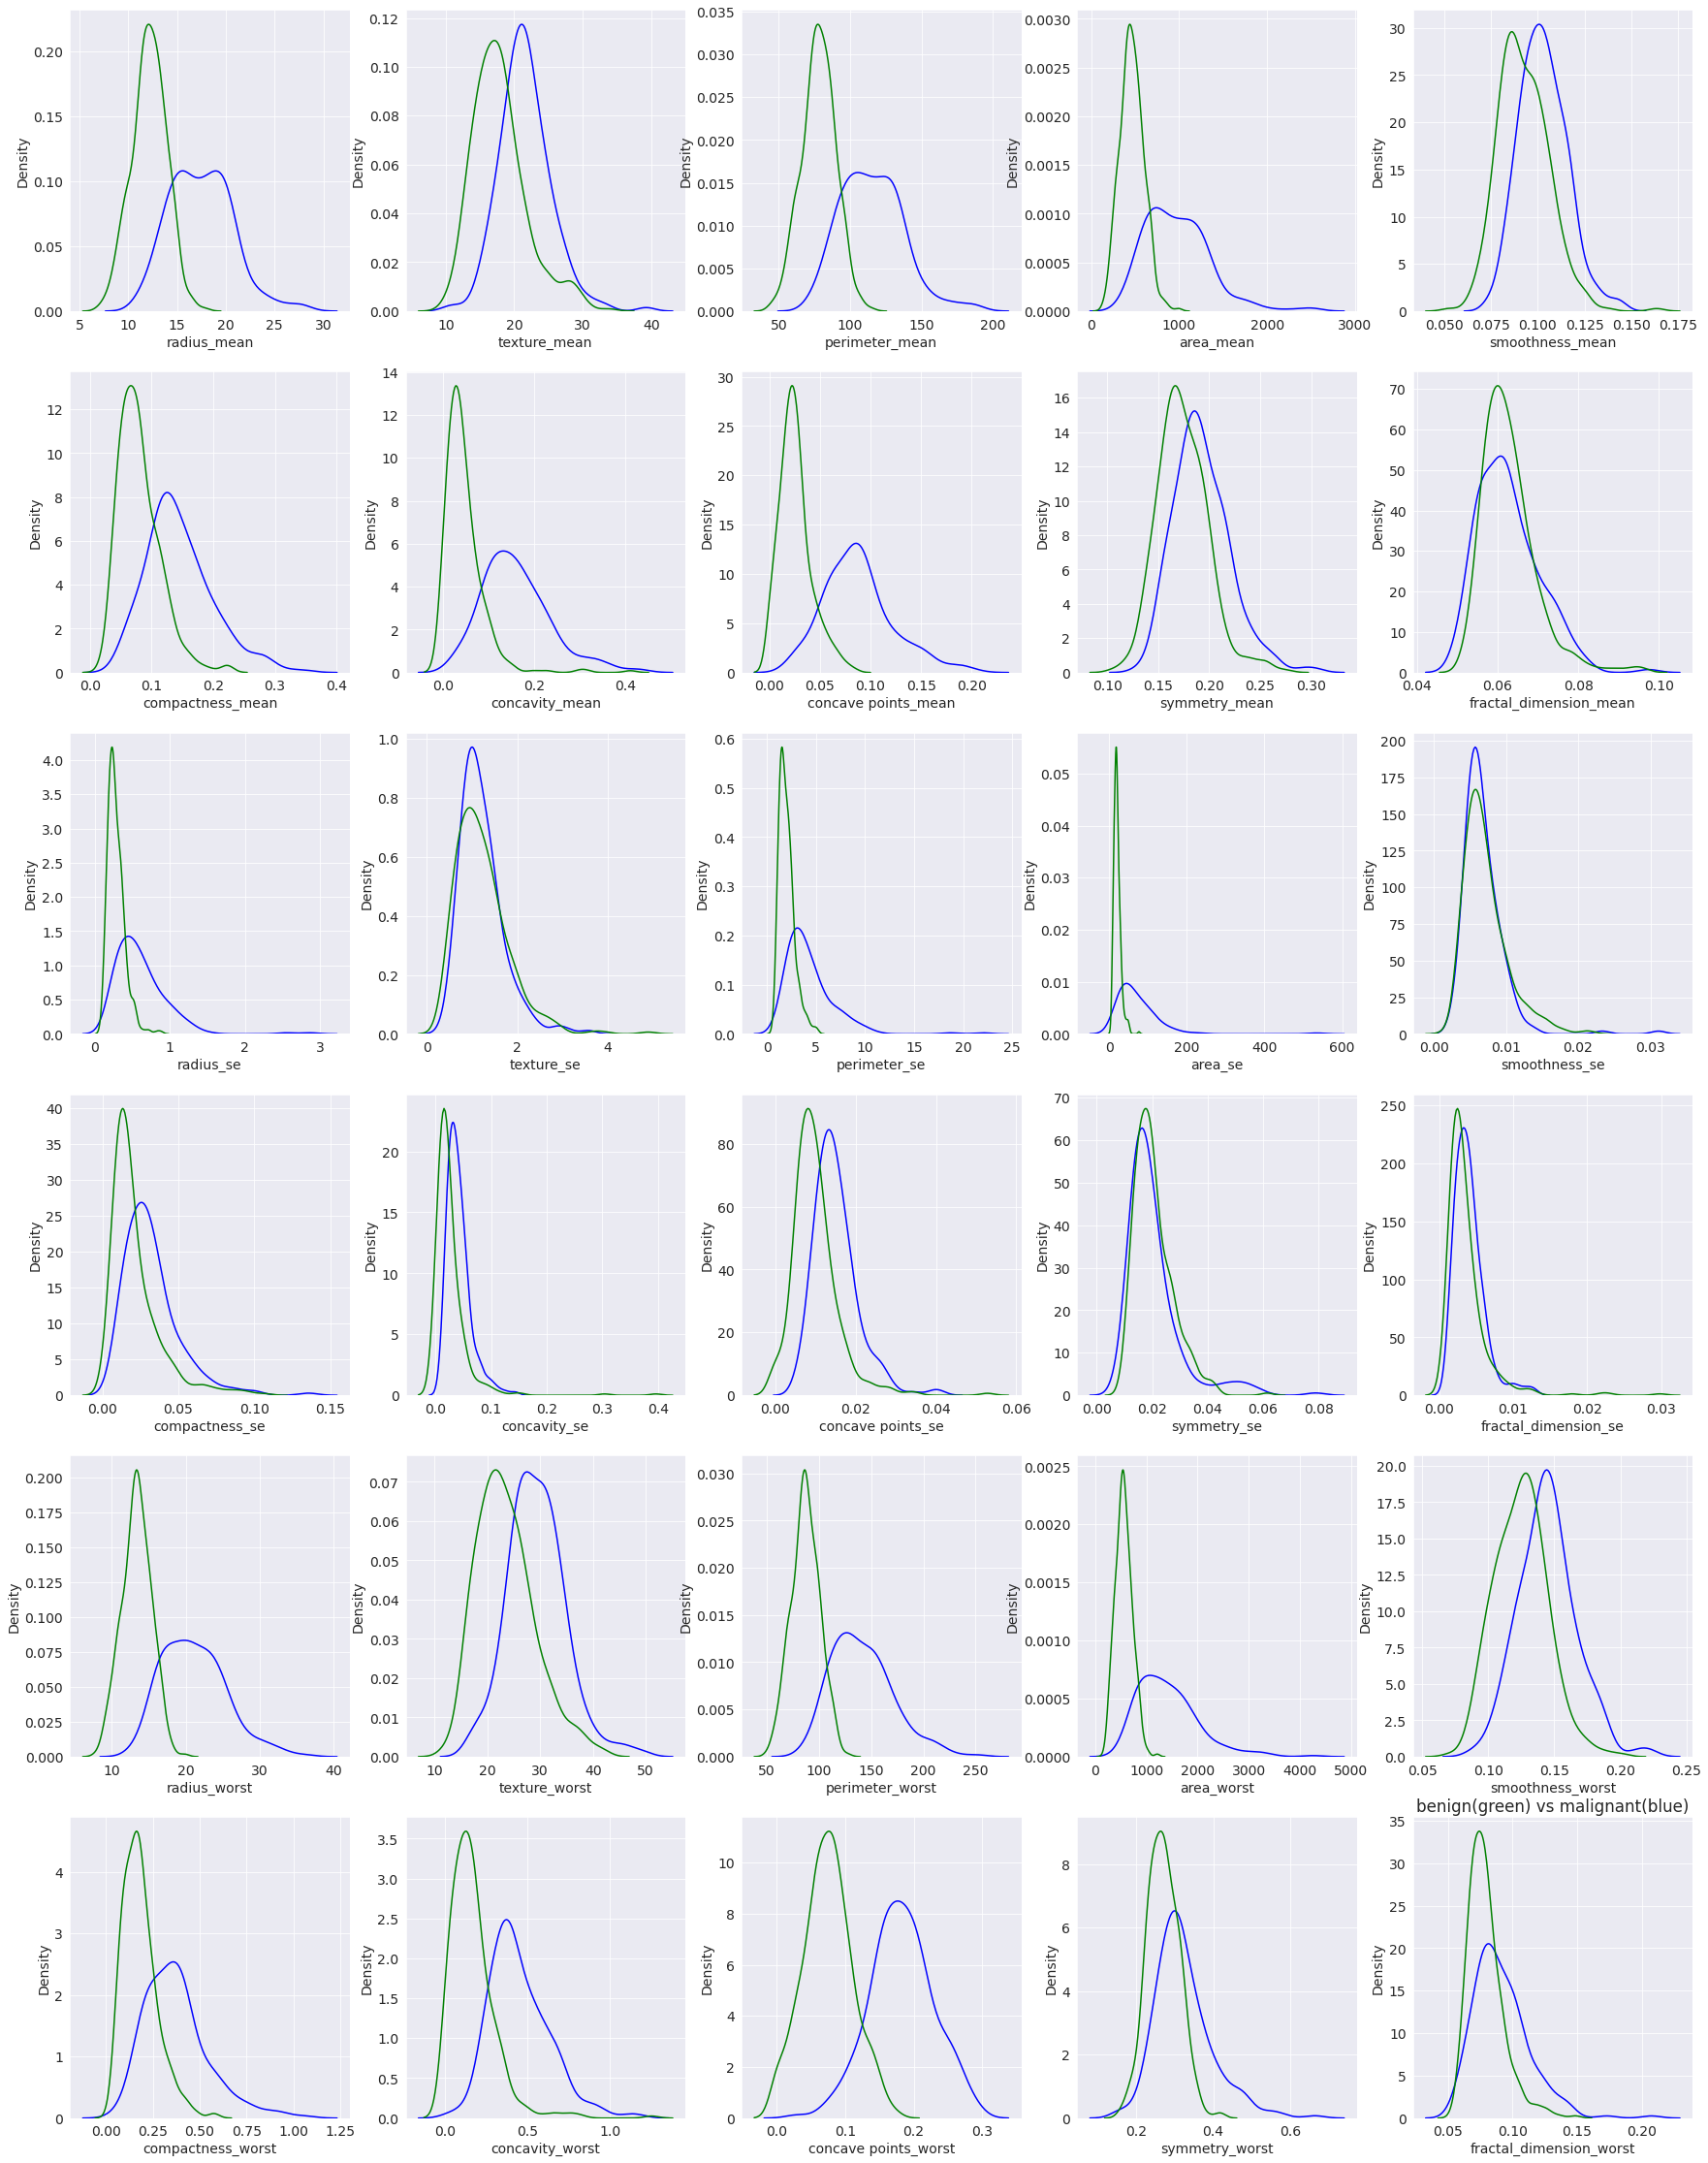

In [20]:
malignant = brest_df.loc[brest_df["diagnosis"]=="M"]
benign = brest_df.loc[brest_df["diagnosis"]=="B"]

i,j = 0,0
number_of_graph_per_raw = len(brest_df.columns)//6
fig, axes =  plt.subplots(6,number_of_graph_per_raw,figsize=(30,40))
        
plt.title("benign(green) vs malignant(blue)")
    
for k in columns:
#     axes[i,j].set_ylabel(k)
    sns.distplot(a=malignant[k],color="blue",hist=False,ax=axes[i,j])
    sns.distplot(a=benign[k],color="green",hist=False,ax=axes[i,j])
    j+=1
    if j %number_of_graph_per_raw==0:
        i+=1
        j=0
plt.show()   

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "landryroni/brest-cancer-classification-dt-rf-gb" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb


'https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb'

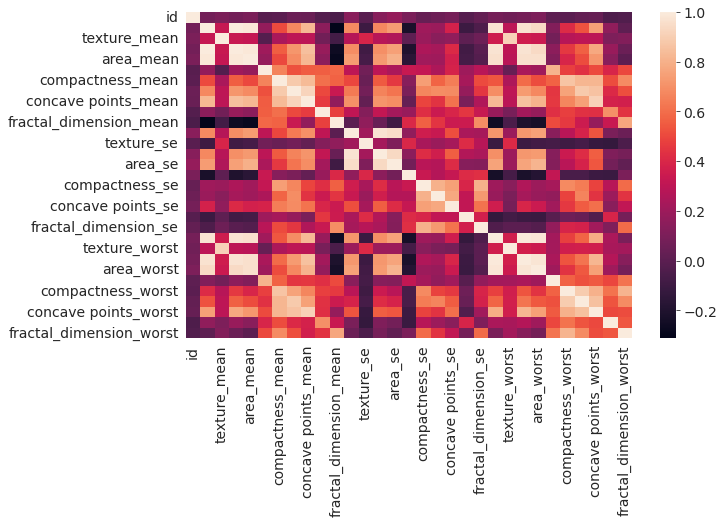

In [24]:
# try to see the correlation beatween feature
sns.heatmap(brest_df.corr());

In [25]:
brest_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [31]:
# find out training data and target
inputs = brest_df.drop(columns=["id","diagnosis"])#list(brest_df.columns)[2:]

target= brest_df["diagnosis"]
# raplce malignant by 1 and bengin by 0
target.replace({'M': 1, 'B': 0}, inplace = True)

In [32]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y= train_test_split(inputs,target,test_size=0.2,random_state=42)

In [33]:
input_cols = list(train_X.columns)
target_col = "diagnosis"

### Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

- Split the data into  train and validation set
- Identify input and target columns
- Identify numeric and categorical columns
- Impute (fill) missing numeric values
- Scale numeric values to the (0,1) range
- Encode categorical columns to one-hot vectors

Taining and validation dataset

In [26]:
# inputs = brest_df[inputs_col].copy()
# targets = brest_df[target_col].copy()

In [36]:
numeric_cols = train_X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_X.select_dtypes('object').columns.tolist()
print("numeric_col:",numeric_cols)
print("categorical:",categorical_cols)

numeric_col: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
categorical: []


In [37]:
# find out if there is categorical col
numeric_col = test_X.select_dtypes(include=np.number).columns.tolist()
categorical_col = test_X.select_dtypes("object").columns.tolist()
print("numeric_col:",numeric_col)
print("categorical:",categorical_col)

numeric_col: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
categorical: []


we observe that just like the descrition has shown to us there is no categorical value in this dataset 

As we dont have missing values there is no need to apply imputer

Scale the numeric features

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scaler.fit(train_X[numeric_col])

MinMaxScaler()

In [41]:
train_X[numeric_col] = scaler.transform(train_X[numeric_col])
test_X[numeric_col] = scaler.transform(test_X[numeric_col])

In [42]:
train_X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.642376,0.078182,0.184273,0.053150,0.020299,0.266377,0.629435,0.767172,0.629286,0.636231,0.299331,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
181,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.505897,0.187688,0.088998,0.172313,0.139444,0.086345,0.340508,0.097778,0.296837,0.188473,0.152018,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
63,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.414280,0.108021,0.420969,0.087217,0.031225,0.238807,0.278848,0.108889,0.295511,0.635298,0.170225,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
248,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.280750,0.050045,0.250354,0.034868,0.018375,0.186151,0.060820,0.027298,0.118299,0.255665,0.059568,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
60,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.413648,0.146406,0.238861,0.120388,0.051958,0.197199,0.065626,0.019356,0.155200,0.633618,0.174751,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.058622,0.166723,0.077323,0.031580,0.408053,0.457914,0.201640,0.142744,0.392419,0.839090,0.150172,0.108734,0.113603,0.034811,0.526804,0.686664,0.143207,0.334533,0.327149,0.726725,0.038557,0.097281,0.041025,0.015085,0.336412,0.237544,0.114537,0.164467,0.135817,0.452357
106,0.193398,0.291512,0.193840,0.103879,0.555836,0.281899,0.165651,0.173211,0.338494,0.320977,0.070433,0.286598,0.065872,0.025809,0.232077,0.156578,0.074369,0.264823,0.144985,0.101751,0.163073,0.459488,0.157694,0.073963,0.663112,0.262143,0.229473,0.418557,0.244628,0.304595
270,0.323179,0.240446,0.301465,0.198318,0.105263,0.025238,0.016987,0.031064,0.182061,0.080034,0.006772,0.079473,0.004095,0.007411,0.060475,0.010950,0.012187,0.068346,0.139572,0.016797,0.227761,0.230011,0.203091,0.114381,0.098485,0.025335,0.030879,0.114536,0.176030,0.052221
435,0.307997,0.335137,0.307298,0.184116,0.481809,0.321622,0.263824,0.321223,0.268019,0.326032,0.039580,0.131078,0.039815,0.022503,0.122412,0.117598,0.055177,0.181228,0.081153,0.067410,0.305606,0.500533,0.302018,0.160207,0.612171,0.361856,0.325000,0.627835,0.318155,0.427772


As there is no categorical column there is no need to apply OneHotEncoder

Let's split the data

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "landryroni/brest-cancer-classification-dt-rf-gb" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb


'https://jovian.ai/landryroni/brest-cancer-classification-dt-rf-gb'

Training the data using  `sklearn.tree` model called `DecisionTreeClassifier` to train a decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [45]:
def rmse(pred,target):
    return mean_squared_error(pred,target,squared=False)

In [46]:
#define Decision Tree model
model = DecisionTreeClassifier(random_state=42)

In [47]:
%%time
model.fit(train_X,train_y)

CPU times: user 9.6 ms, sys: 54 µs, total: 9.65 ms
Wall time: 8.37 ms


DecisionTreeClassifier(random_state=42)

we just created a decision tree using training data,
next less evaluate the decision tree 

In [48]:
#find the decision tree model prediction on training and testing data
train_pred = model.predict(train_X)
test_dt_pred= model.predict(test_X)

In [49]:
# find training and testing error 
print("DT training error:",rmse(train_y,train_pred))
print("DT testing error:",rmse(test_y,test_dt_pred))

DT training error: 0.0
DT testing error: 0.22941573387056177


In [50]:
# find score(accuracy) on training and testing 
print("DT training score:",model.score(train_X,train_y))
print("DT testing score:",model.score(test_X,test_y))

DT training score: 1.0
DT testing score: 0.9473684210526315


In [51]:
# pd.value_counts(train_pred)

In [52]:
# print("training accuracy:",accuracy_score(train_y,train_pred))
# print("testing  accuracy:",accuracy_score(test_y,test_dt_pred))

In [53]:
# find most importance feature and range in order
dt_important_attribute = pd.DataFrame({
    "feature": train_X.columns,
    "dt_importances": model.feature_importances_
}).sort_values("dt_importances",ascending=False)

In [54]:
dt_important_attribute.head(10)

,feature,dt_importances
7,concave points_mean,0.691420
27,concave points_worst,0.065651
1,texture_mean,0.058478
20,radius_worst,0.052299
22,perimeter_worst,0.051494
19,fractal_dimension_se,0.018554
21,texture_worst,0.017445
17,concave points_se,0.015931
13,area_se,0.011983
24,smoothness_worst,0.009233


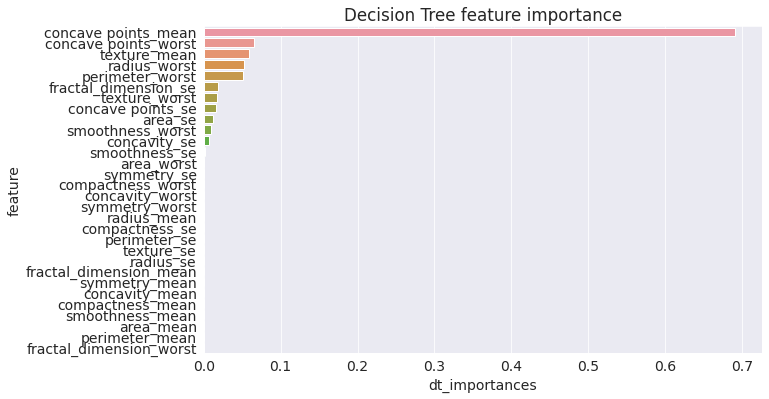

In [55]:
plt.title("Decision Tree feature importance");
sns.barplot(data=dt_important_attribute,y="feature",x="dt_importances");

the result we got is not that acceptable can be improve by applying hyperparameter tuning

Let's try to apply `Random Forest`

Use the model `RandomForestClassifier` from `sklearn.ensemble`

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
%%time
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42)
rf_model

CPU times: user 0 ns, sys: 81 µs, total: 81 µs
Wall time: 88 µs


RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` is to allows multiple parallel wokers to train decision trees in random forest
`random_state=42` can be choose randomly as its to make sure that we will get the same result each time we execute the model

In [58]:
# fit the random frorest model
rf_model.fit(train_X,train_y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [59]:
# find the random forest model prediction on training and testing data
train_rf_pred = rf_model.predict(train_X)
test_rf_pred = rf_model.predict(test_X)

In [60]:
# find using random forest, training and testing error 
print("RF training error:",rmse(train_y,train_rf_pred))
print("RF testing error:",rmse(test_y,test_rf_pred))

RF training error: 0.0
RF testing error: 0.1873171623163388


In [61]:
# find score(accuracy using random forest) on training and testing 
print("RF training score:",rf_model.score(train_X,train_y))
print("RF testing score:",rf_model.score(test_X,test_y))

RF training score: 1.0
RF testing score: 0.9649122807017544


As `Random Forest` is an ensemble of `Decision Tree` we can check each each individual decision tree using `model.estimators_` 

In [62]:
#try to check the three number 3
rf_model.estimators_[3]

DecisionTreeClassifier(max_features='auto', random_state=787846414)

In [63]:
#check the number of estimators
# len(rf_model.estimators_)

In [64]:
#lets sort features importance to but notice that random forest also assign an importance to each feature by 
# combining the importance values from individual trees
rf_feature_importance = pd.DataFrame({
    "feature": train_X.columns,
    "rf_importances": rf_model.feature_importances_
}).sort_values("rf_importances",ascending=False)

In [65]:
rf_feature_importance.head(10)

,feature,rf_importances
23,area_worst,0.153892
27,concave points_worst,0.144663
7,concave points_mean,0.106210
20,radius_worst,0.077987
6,concavity_mean,0.068001
22,perimeter_worst,0.067115
2,perimeter_mean,0.053270
0,radius_mean,0.048703
3,area_mean,0.047555
26,concavity_worst,0.031802


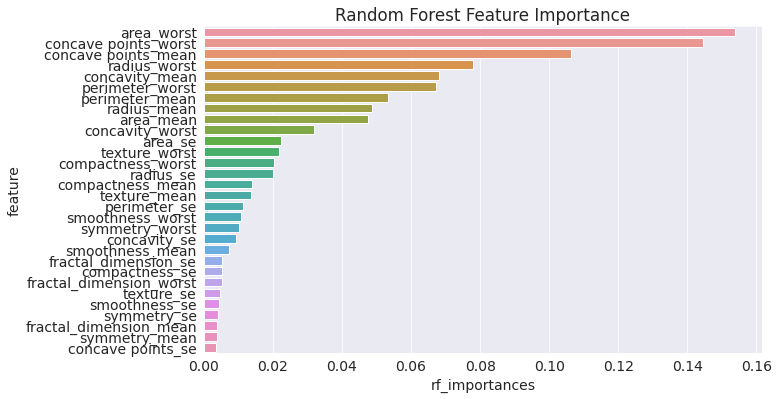

In [66]:
plt.title("Random Forest Feature Importance")
sns.barplot(data=rf_feature_importance,y="feature",x="rf_importances");

we can observe that in `Random Forest` each features has contributed where in `Decision Tree` only first `11` attributes contributed to the classification

Let's try to use `Gradient Boosting` from `sklearn.ensemble`.  `Gradient Boosting` has is library called `xgboost` which can alsoe be use direct.

In [67]:
#!pip install xgboost --quiet
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
# define the Gradient Boosting model
#gb_model = XGBClassifier(random_state=42,n_jobs=-1,n_estimators=500,max_depth=4)
gb_model = GradientBoostingClassifier(random_state=42)

In [69]:
%%time
# train the model
gb_model.fit(train_X,train_y)

CPU times: user 333 ms, sys: 793 µs, total: 334 ms
Wall time: 332 ms


GradientBoostingClassifier(random_state=42)

In [70]:
# find the gradient bossting model prediction on training and testing data
train_gb_pred = gb_model.predict(train_X)
test_gb_pred = gb_model.predict(test_X)

In [71]:
# find using gradient bossting, training and testing error 
print("GB training error:",rmse(train_y,train_gb_pred))
print("GB testing error:",rmse(test_y,test_gb_pred))

GB training error: 0.0
GB testing error: 0.20942695414584775


In [72]:
# find score(accuracy using gradient bossting) on training and testing 
print("GB training score:",gb_model.score(train_X,train_y))
print("GB testing score:",gb_model.score(test_X,test_y))

GB training score: 1.0
GB testing score: 0.956140350877193


In [73]:
#lets sort features importance of default Gradient Boosting model 
gb_feature_importance = pd.DataFrame({
    "feature": train_X.columns,
    "gb_importances": gb_model.feature_importances_
}).sort_values("gb_importances",ascending=False)

In [74]:
gb_feature_importance.head(10)

,feature,gb_importances
7,concave points_mean,0.450425
27,concave points_worst,0.240076
20,radius_worst,0.075552
22,perimeter_worst,0.051372
21,texture_worst,0.039886
23,area_worst,0.038278
1,texture_mean,0.027821
26,concavity_worst,0.019716
16,concavity_se,0.012966
13,area_se,0.008462


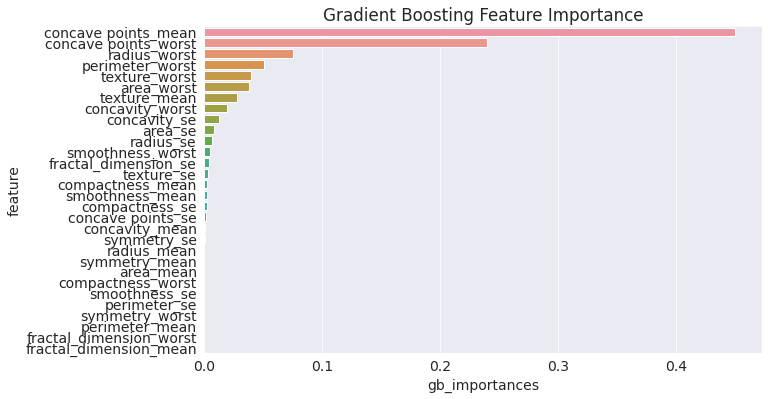

In [75]:
plt.title("Gradient Boosting Feature Importance")
sns.barplot(data=gb_feature_importance,y="feature",x="gb_importances");

Let's try to tune some `Hyperparameter` such as `max_depth`, `n_estimators` and see the result 

In [76]:
gb2_model = GradientBoostingClassifier(random_state=42,n_estimators=1000,max_depth=3,learning_rate=0.1).fit(train_X,train_y)
gb2_model

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [77]:
# find the gradient bossting with tuned Hyperparameters(max_depth,n_estimators) model prediction on training and testing data
train_gb2_pred = gb2_model.predict(train_X)
test_gb2_pred = gb2_model.predict(test_X)

In [78]:
# find using gradient bossting with tuned hyperparameters, training and testing error 
print("GBT training error:",rmse(train_y,train_gb2_pred))
print("GBT testing error:",rmse(test_y,test_gb2_pred))

GBT training error: 0.0
GBT testing error: 0.1873171623163388


In [79]:
# find score(accuracy using gradient bossting with tuned hyperparameters) on training and testing 
print("GBT training score:",gb2_model.score(train_X,train_y))
print("GBT testing score:",gb2_model.score(test_X,test_y))

GBT training score: 1.0
GBT testing score: 0.9649122807017544


In [80]:
#lets sort features importance when hyperparameters are tuned
gb2_feature_importance = pd.DataFrame({
    "feature": train_X.columns,
    "gbt_importances": gb2_model.feature_importances_
}).sort_values("gbt_importances",ascending=False)

In [81]:
gb2_feature_importance.head(10)

,feature,gbt_importances
7,concave points_mean,0.450390
27,concave points_worst,0.240061
20,radius_worst,0.075547
22,perimeter_worst,0.051374
21,texture_worst,0.039903
23,area_worst,0.038278
1,texture_mean,0.027821
26,concavity_worst,0.019718
16,concavity_se,0.012966
13,area_se,0.008462


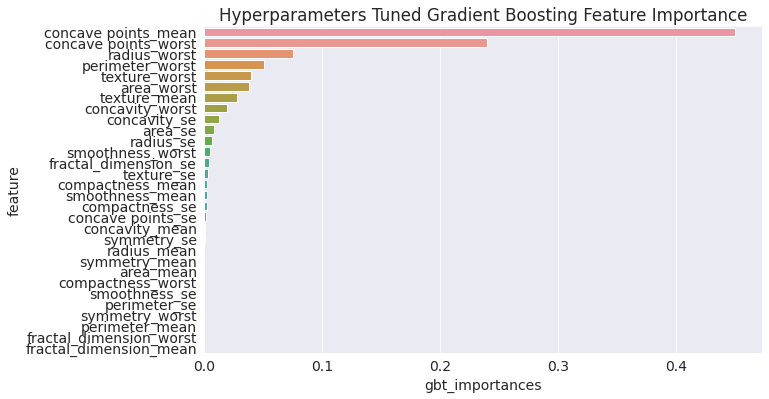

In [82]:
plt.title("Hyperparameters Tuned Gradient Boosting Feature Importance")
sns.barplot(data=gb2_feature_importance,y="feature",x="gbt_importances");

Let's observe the `importances` or impact of each `features` using different model

In [78]:
#combine feature importance dataframe
model_features_importance_df = dt_important_attribute.merge(rf_feature_importance,on="feature",how="left").merge(gb_feature_importance,on="feature",how="left").merge(gb2_feature_importance,on="feature",how="left")
model_features_importance_df

,feature,dt_importances,rf_importances,gb_importances,gbt_importances
0,concave points_mean,0.691420,0.106210,0.450425,0.450390
1,concave points_worst,0.065651,0.144663,0.240076,0.240061
2,texture_mean,0.058478,0.013591,0.027821,0.027821
3,radius_worst,0.052299,0.077987,0.075552,0.075547
4,perimeter_worst,0.051494,0.067115,0.051372,0.051374
5,fractal_dimension_se,0.018554,0.005321,0.004313,0.004313
6,texture_worst,0.017445,0.021749,0.039886,0.039903
7,concave points_se,0.015931,0.003513,0.002053,0.002055
8,area_se,0.011983,0.022407,0.008462,0.008462
9,smoothness_worst,0.009233,0.010644,0.004828,0.004828


We can observe the difference or impact of each attribute in different model, `Decision Tree` are based only on few features as several doesnt have an impact in the final decision.
`Random forest` best features or features that has higher impact are not the same with `Decision Tree` and `Grandient Boosting` this can reflect the fact that model have different structure and different training process.
`Grandient Boosting`(gb2_model) with `tuned` Hyperparameters  has improved the result  to be the same as `Random Forest` .

the first 3 model were trained using the default mode; Better result can be optained by `tuning Hyperparameters`.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>